In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [18]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

In [19]:
train_dataset = torchvision.datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root="./data", train=False, transform=transform, download=True)

In [20]:
image, label = train_dataset[0]
print(image.shape)
print(len(train_dataset))

torch.Size([1, 28, 28])
60000


In [21]:
image, label = test_dataset[0]
print(image.shape)
print(len(test_dataset))

torch.Size([1, 28, 28])
10000


In [22]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [37]:
class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 3 * 3, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 128 * 3 * 3)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [38]:
from torchsummary import summary
model = CNNClassifier()
if torch.cuda.is_available():
    device = torch.device("cuda")
    model.to(device)
print('Name: SURYA P        ')
print('Register Number: 212224230280      ')
summary(model, input_size=(1, 28, 28))

Name: SURYA P        
Register Number: 212224230280      
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
            Conv2d-3           [-1, 64, 14, 14]          18,496
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Conv2d-5            [-1, 128, 7, 7]          73,856
         MaxPool2d-6            [-1, 128, 3, 3]               0
            Linear-7                  [-1, 128]         147,584
            Linear-8                   [-1, 10]           1,290
Total params: 241,546
Trainable params: 241,546
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.42
Params size (MB): 0.92
Estimated Total Size (MB): 1.34
-------------------------------------------------

In [43]:
model = CNNClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')
model = model.to(device)

Using device: cpu


In [46]:
def train_model(model, train_loader, num_epochs=3):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print('Name: SURYA P')
        print('Register Number: 212224230280')
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')
train_model(model, train_loader)

Name: SURYA P
Register Number: 212224230280
Epoch [1/3], Loss: 0.1807
Name: SURYA P
Register Number: 212224230280
Epoch [2/3], Loss: 0.1570
Name: SURYA P
Register Number: 212224230280
Epoch [3/3], Loss: 0.1380


In [49]:
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = correct / total
    print('Name: SURYA P')
    print('Register Number: 212224230280')
    print(f'Test Accuracy: {accuracy:.4f}')

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    print("\n")
    print('Name: SURYA P')
    print('Register Number: 212224230280')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print("\n")
    print('Name: SURYA P')
    print('Register Number: 212224230280')
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=test_dataset.classes))


Name: SURYA P
Register Number: 212224230280
Test Accuracy: 0.9189


Name: SURYA P
Register Number: 212224230280


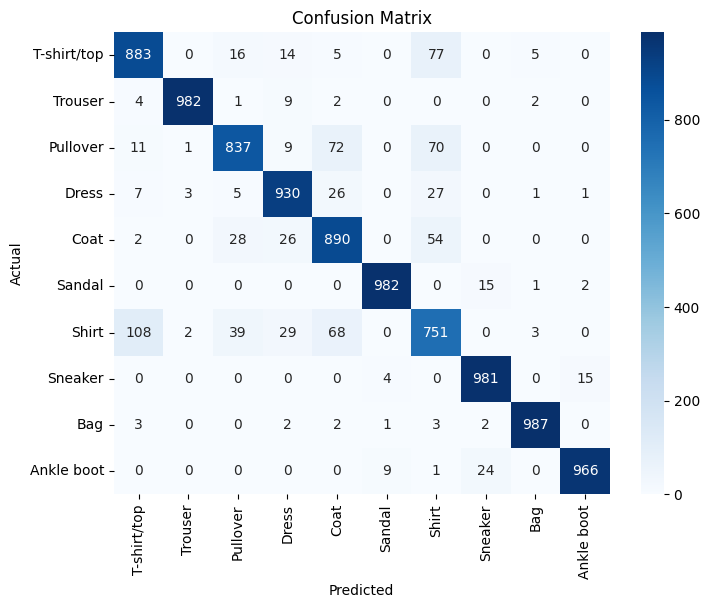



Name: SURYA P
Register Number: 212224230280
Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.87      0.88      0.88      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.90      0.84      0.87      1000
       Dress       0.91      0.93      0.92      1000
        Coat       0.84      0.89      0.86      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.76      0.75      0.76      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.98      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [50]:
test_model(model, test_loader)

In [51]:
import matplotlib.pyplot as plt
def predict_image(model, image_index, dataset):
    model.eval()
    image, label = dataset[image_index]
    with torch.no_grad():
        output = model(image.unsqueeze(0))
        _, predicted = torch.max(output, 1)
    class_names = dataset.classes

    print('Name: SURYA P')
    print('Register Number: 212224230280')
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(f'Actual: {class_names[label]}\nPredicted: {class_names[predicted.item()]}')
    plt.axis("off")
    plt.show()
    print(f'Actual: {class_names[label]}, Predicted: {class_names[predicted.item()]}')

Name: SURYA P
Register Number: 212224230280


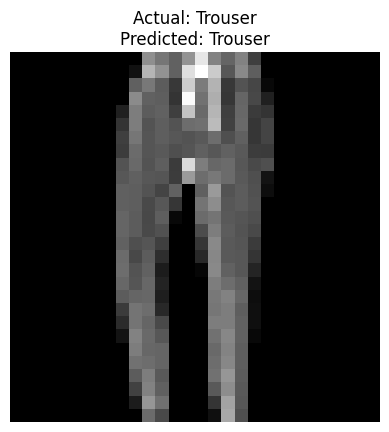

Actual: Trouser, Predicted: Trouser


In [52]:
predict_image(model, image_index=80, dataset=test_dataset)